In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Dataset
The data were generated using a Monte Carlo simulation (CORSIKA) to model high-energy gamma detection in a ground-based Cherenkov telescope. The telescope captures Cherenkov radiation emitted by charged particles in atmospheric showers triggered by gamma rays. These photons form patterns on the camera, allowing statistical discrimination between gamma signals and cosmic-ray background. Principal Component Analysis is applied to extract features like Hillas parameters, which help classify events. Asymmetry and cluster extent in the image also aid in separation. The dataset includes events with energies as low as 50 GeV.

[link] https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
pd.read_csv("Dataset/magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


## Attributes Information
* fLength – Major axis length of the image ellipse.
* fWidth – Minor axis width of the image ellipse.
* fSize – Total signal (sum of all pixels) in the image.
* fConc – Ratio of the sum of the two highest pixel values to the total signal.
* fConc1 – Ratio of the highest pixel value to the total signal.
* fAsym – Asymmetry of the image along its major axis.
* fM3Long – Third moment along the major axis (skewness).
* fM3Trans – Third moment along the minor axis.
* fAlpha – Angle between the major axis and a reference direction.
* fDist – Distance from the image centroid to the camera center.
* class – Event classification: 'g' for gamma-ray (signal) and 'h' for hadron (background).

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("Dataset/magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"] == "g").astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


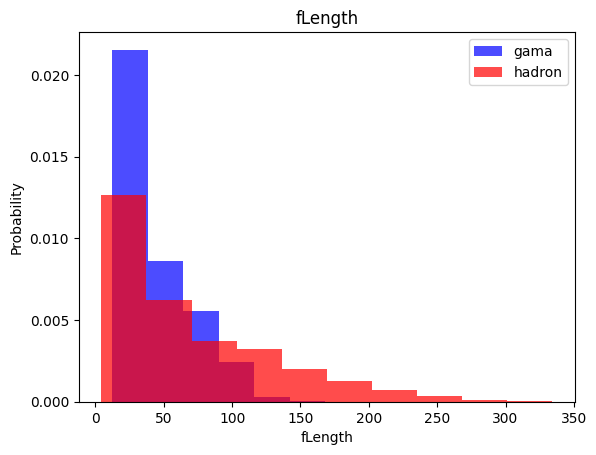

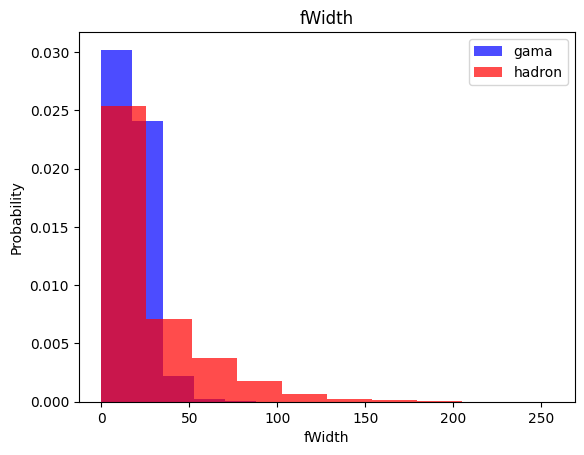

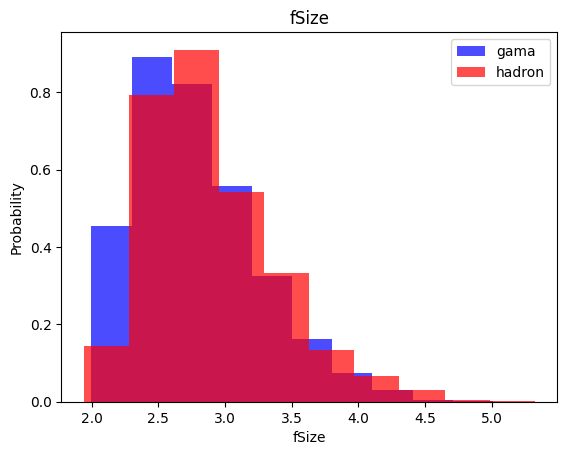

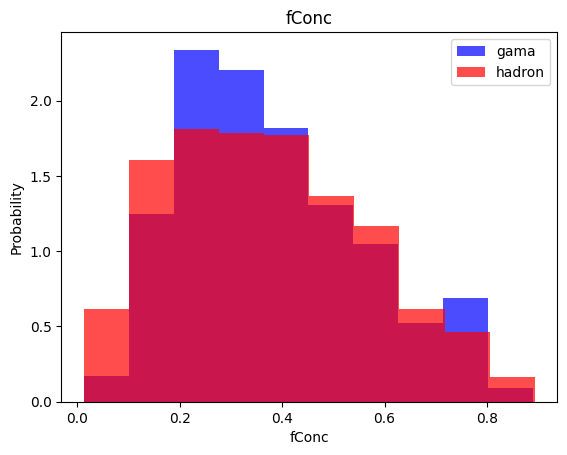

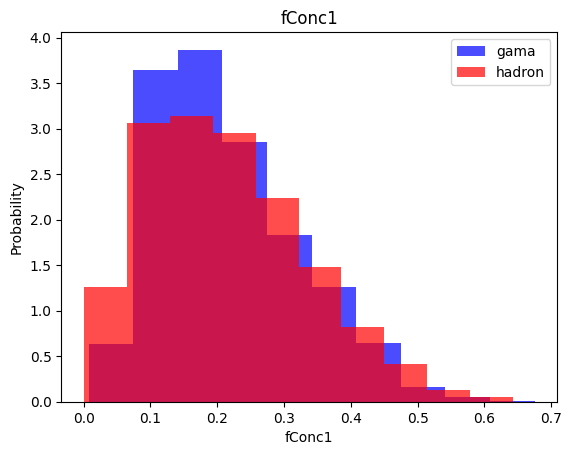

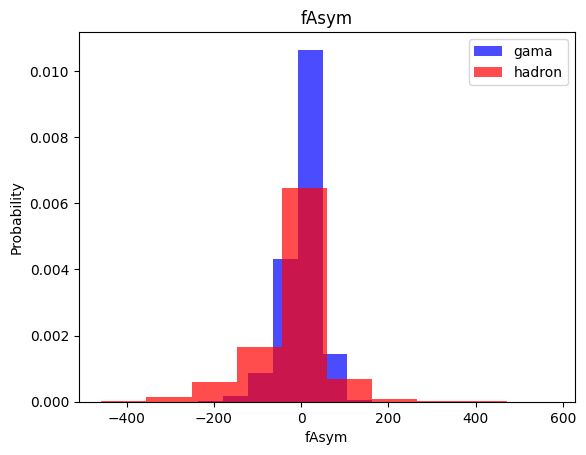

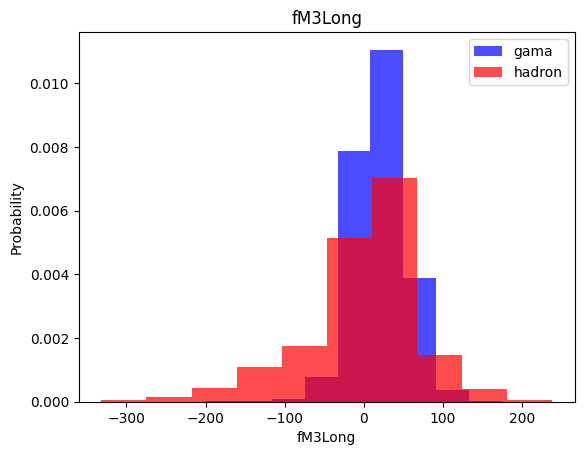

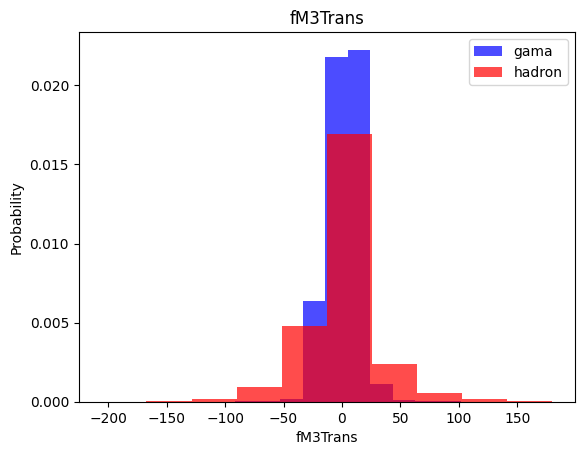

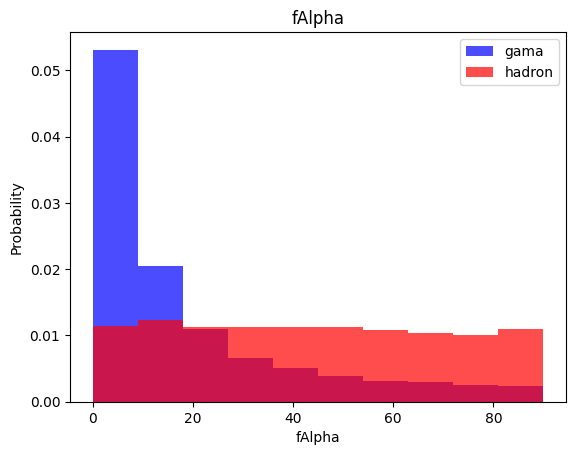

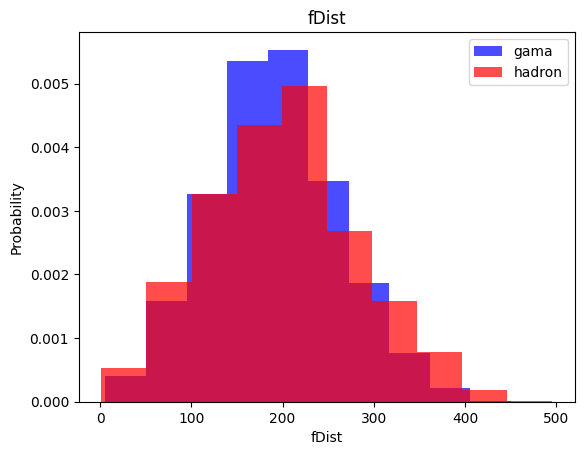

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gama', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, Validation and Test Datasets

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\yas\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe):
    X = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(len(y),(-1,1))))

    return data, X, y

In [10]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) 

7415
3997


In [ ]:
!pip install imbalanced-learn

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import numpy as np

def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

In [14]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [15]:
len(y_train)

14830

In [16]:
sum((y_train) == 1)

7415

In [17]:
sum((y_train) == 0)

7415

In [18]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1362
           1       0.83      0.88      0.86      2442

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [25]:
## https://en.wikipedia.org/wiki/Precision_and_recall

In [26]:
knn_model = KNeighborsClassifier(n_neighbors = 3) ## change k-value
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1362
           1       0.84      0.86      0.85      2442

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 5) ## change k-value
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1362
           1       0.85      0.87      0.86      2442

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.37      0.48      1362
           1       0.72      0.90      0.80      2442

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.68      3804



## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [33]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1362
           1       0.84      0.82      0.83      2442

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## SVM

In [34]:
from sklearn.svm import SVC

In [35]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [36]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1362
           1       0.88      0.90      0.89      2442

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

